# **LSTM Exercise**

## Import libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
from keras.layers import Dropout

In [118]:
# fix random seed for reproducibility
tf.random.set_seed(7)

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [119]:
dataframe = pd.read_csv('/content/traffic-2.csv',index_col='DateTime', parse_dates=True)
# dataframe['DateTime'] = dataframe['DateTime'].apply(lambda x: x.timestamp())
# dataset = dataframe.values
# dataset = dataset.astype('float32')



In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [120]:
dataframe = dataframe.drop('ID',axis=1)

## Normalize the dataset

In [129]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe[['Vehicles']] = scaler.fit_transform(dataframe[['Vehicles']])
dataframe[['Junction']] = scaler.fit_transform(dataframe[['Junction']])

## split into train and test sets

In [137]:
train_size = int(len(dataframe) * 0.80)
test_size = len(dataframe) - train_size
train, test = dataframe.iloc[0:train_size, :], dataframe.iloc[train_size:len(dataframe),:]
print(len(train), len(test))

# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
# train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]

# # split into train and test sets
# train_size = int(len(dataset) * 0.7)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test))

38496 9624


In [138]:
def create_dataset(dataframe, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataframe)-look_back-1):
        a = dataframe.iloc[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataframe.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [139]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)




In [140]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))




## Fit the LSTM

In [141]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=2)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1203/1203 - 5s - 4ms/step - loss: 0.0132
Epoch 2/20
1203/1203 - 2s - 2ms/step - loss: 0.0047
Epoch 3/20
1203/1203 - 2s - 2ms/step - loss: 0.0041
Epoch 4/20
1203/1203 - 2s - 2ms/step - loss: 0.0040
Epoch 5/20
1203/1203 - 3s - 2ms/step - loss: 0.0040
Epoch 6/20
1203/1203 - 3s - 3ms/step - loss: 0.0039
Epoch 7/20
1203/1203 - 2s - 2ms/step - loss: 0.0040
Epoch 8/20
1203/1203 - 3s - 2ms/step - loss: 0.0040
Epoch 9/20
1203/1203 - 3s - 2ms/step - loss: 0.0039
Epoch 10/20
1203/1203 - 2s - 2ms/step - loss: 0.0040
Epoch 11/20
1203/1203 - 3s - 3ms/step - loss: 0.0040
Epoch 12/20
1203/1203 - 4s - 3ms/step - loss: 0.0040
Epoch 13/20
1203/1203 - 3s - 2ms/step - loss: 0.0040
Epoch 14/20
1203/1203 - 2s - 2ms/step - loss: 0.0039
Epoch 15/20
1203/1203 - 3s - 2ms/step - loss: 0.0040
Epoch 16/20
1203/1203 - 5s - 4ms/step - loss: 0.0040
Epoch 17/20
1203/1203 - 2s - 2ms/step - loss: 0.0040
Epoch 18/20
1203/1203 - 2s - 2ms/step - loss: 0.0040
Epoch 19/20
1203/1203 - 3s - 2ms/step - loss: 0.0040
Epoch 20/20
1

## Make preductuion and evaluatuin matrix.

In [142]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Score: 0.02 RMSE
Test Score: 0.10 RMSE


## Visualize the result

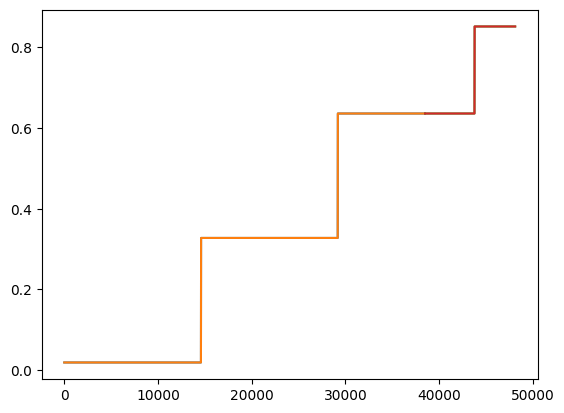

In [148]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataframe)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataframe))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)